Task Implemented-

1. Data manipulation 
2. LSTM autoencoder with Tensor flow and keras implemented 

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

In [105]:
train_data_frame  = pd.read_excel(r'path1')
test_data_frame = pd.read_excel(r'path2')
del train_data_frame['Unnamed: 0']
del test_data_frame['Unnamed: 0']
train_data_frame.head()

,2,2_voltage,2_max,2_multplied,3,3_voltage,3_max,3_multplied,4,4_voltage,...,47_max,47_multplied,48,48_voltage,48_max,48_multplied,49,49_voltage,49_max,49_multplied
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007729,"[0.987662598900362, 2.12887220061687, 2.845648...",...,3.101784,0.024242,0.007763,"[2.2576102990478746, 3.089043851414778, 2.8664...",3.137321,0.024354,NaN,NaN,NaN,NaN
1,0.007902,"[0.8421617272361539, 2.833579187340754, 4.1531...",4.153145,0.032817,0.008008,"[1.1264583612712886, 2.278396137857047, 2.8389...",3.118546,0.024975,0.008596,"[1.3980152876491887, 2.6156631353091053, 2.919...",...,3.082339,0.023132,0.007441,"[1.4999329489070672, 2.553305618881588, 2.8376...",3.150060,0.023439,0.008935,"[0.8589245004693576, 1.4462920745608154, 2.584...",3.209065,0.028674
2,NaN,NaN,NaN,NaN,0.007978,"[0.6141880112645837, 1.957221402708864, 2.7309...",3.131957,0.024988,0.007817,"[0.8300925305082473, 2.359527960305753, 2.7229...",...,3.054848,0.023765,NaN,NaN,NaN,NaN,0.008980,"[0.5900496178087703, 1.6159313396808368, 2.271...",3.215100,0.028873
3,0.008793,"[1.2612310580662465, 2.539224889365697, 2.8020...",3.072952,0.027019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.007471,"[1.9981225693978808, 2.9589647311251173, 2.952...",3.215770,0.024024,0.007453,"[1.5770417057798043, 2.7102051763443744, 2.881...",3.188279,0.023762
4,0.008476,"[2.024272495641679, 2.903982834920209, 2.88520...",3.346520,0.028366,0.007778,"[0.973581869384471, 2.128201689687542, 2.91135...",3.131957,0.024359,0.007724,"[1.4214831701756738, 2.745071744669438, 3.0226...",...,3.097090,0.026274,0.007773,"[1.0258817218720666, 3.0206517366233068, 3.025...",3.240579,0.025189,NaN,NaN,NaN,NaN


In [106]:
test_data_frame.head()

,2,2_voltage,2_max,2_multplied,4,4_voltage,4_max,4_multplied,5,5_voltage,...,65_max,65_multplied,66,66_voltage,66_max,66_multplied,67,67_voltage,67_max,67_multplied
0,0.008277,"[2.008180233337804, 3.0059004961780875, 2.8664...",3.415583,0.028270,NaN,NaN,NaN,NaN,0.007475,"[1.6487863752179162, 2.745742255598766, 2.8020...",...,3.110500,0.021251,0.007705,"[2.469491752715569, 3.4940324527289794, 2.8932...",3.494032,0.026920,NaN,NaN,NaN,NaN
1,0.009051,"[1.0842161727236157, 2.260292342765187, 2.6592...",3.136650,0.028391,NaN,NaN,NaN,NaN,0.007693,"[1.0252112109427385, 2.252246211613249, 2.8825...",...,3.110500,0.024064,0.007760,"[1.186133833981494, 2.540565911224353, 2.93616...",2.991149,0.023212,0.008179,"[0.6926377899959769, 1.91162665951455, 1.76880...",3.258683,0.026653
2,0.007501,"[0.7784631889499799, 2.0765723481292744, 2.888...",3.109830,0.023325,0.007937,"[1.0694649322783962, 1.6219659380447902, 2.729...",3.053507,0.024237,0.007768,"[1.6326941129140404, 2.265656430199812, 2.8530...",...,3.111841,0.025640,0.007988,"[1.0319163202360198, 1.5629609762639132, 2.697...",3.035403,0.024246,0.009425,"[2.169102856376559, 3.921818425640338, 3.87354...",3.921818,0.036962
3,0.009032,"[1.3343167493630146, 2.4983237226766795, 2.846...",3.598632,0.032502,0.007808,"[0.6631353091055384, 1.3913101783559072, 2.158...",3.086362,0.024098,NaN,NaN,...,4.413973,0.037677,0.007672,"[0.951455008716642, 2.064503151401368, 2.59957...",3.016629,0.023143,0.011027,"[2.448035402977069, 2.649188681775513, 2.46680...",3.156765,0.034810
4,0.009573,"[1.0453265388225828, 2.3018640203835323, 2.815...",3.121228,0.029881,0.008498,"[1.807026954539359, 1.6541504626525412, 2.7779...",3.119887,0.026513,0.007781,"[2.662598900362076, 2.930803272093335, 2.99785...",...,3.168164,0.024658,0.007471,"[1.6648786375217917, 2.7913369987930805, 2.917...",3.062223,0.022877,0.007914,"[1.1338339814938982, 2.2395065039560147, 2.762...",3.189620,0.025243


In [107]:
print(train_data_frame['48_voltage'])

0      [2.2576102990478746, 3.089043851414778, 2.8664...
1      [1.4999329489070672, 2.553305618881588, 2.8376...
2                                                    NaN
3      [1.9981225693978808, 2.9589647311251173, 2.952...
4      [1.0258817218720666, 3.0206517366233068, 3.025...
                             ...                        
869    [0.5565240713423629, 1.38661660185061, 2.40646...
870    [1.0258817218720666, 2.716239774708328, 2.8382...
871    [1.884806222341424, 2.509722408475258, 2.84497...
872    [1.372535872334719, 2.553976129810916, 2.77926...
873    [2.102051763443744, 2.960305752983773, 2.81279...
Name: 48_voltage, Length: 874, dtype: object


In [108]:
train_data_list = []
i = 0

for col in train_data_frame.columns:
    i += 1
    if 'voltage' in str(col):
        #print(col)
            #print(train_data_frame[col].iloc[1].dro)
            #print(len(train_data_frame[col].dropna()))
            train_data_list.append(train_data_frame[col].dropna())


new_dataframe = pd.concat(train_data_list, ignore_index=True)
new_dataframe = new_dataframe.to_frame()
#print(len(new_dataframe))
new_dataframe['label'] = 1
# new_dataframe.to_csv('test_delete.csv')
# print(new_dataframe.colown())
print(new_dataframe.columns)
new_dataframe.head()

Index([0, 'label'], dtype='object')


,0,label
0,"[0.8421617272361539, 2.833579187340754, 4.1531...",1
1,"[1.2612310580662465, 2.539224889365697, 2.8020...",1
2,"[2.024272495641679, 2.903982834920209, 2.88520...",1
3,"[0.892450046935765, 1.9505162934155824, 2.6424...",1
4,"[0.7241518036743999, 2.1221670913235884, 3.037...",1


In [109]:
new_dataframe.rename(columns = {0:'raw_voltage'}, inplace = True)
print(type(new_dataframe[new_dataframe.columns[0]].iloc[0]))
print(new_dataframe[new_dataframe.columns[0]].iloc[0])

<class 'str'>
[0.8421617272361539, 2.833579187340754, 4.153144696258549, 4.034464261767467, 2.944213490679898, 2.952259621831836, 2.9683518841357115, 3.0152876491886818, 2.9991953868848062, 2.9643288185597427, 2.9562826874078048, 2.993831299450181, 3.0286978677752447, 3.0045594743194317, 3.0005364087434625, 3.038085020785839, 3.0206517366233068, 2.9723749497116803, 2.971033927853024, 2.9723749497116803, 2.9361673595279605, 2.9013007912028965, 2.88923159447499, 2.9013007912028965, 2.88923159447499, 2.8516829824326138, 2.8543650261499263, 2.834249698270082, 2.8288856108354565, 2.8476599168566445, 1.98404183988199, 0.5665817352822851]


In [110]:
def str_float_conversion(float_string):
    list_new_volatge =  []
    float_string = float_string.split(',')
    for i in float_string:
        i = i.replace('[', '')
        i = i.replace(']', '')
        i = i.replace(' ', '')
        i = float(i)
        #print(i)
        list_new_volatge.append(i)
    x = 63- len(list_new_volatge)
    for i in range(x):
        list_new_volatge.append(float(0.5))
    return list_new_volatge

In [111]:
new_dataframe['raw_voltage'] = new_dataframe['raw_voltage'].apply(lambda x: str_float_conversion(x)  )
print(new_dataframe['raw_voltage'].iloc[1])
print(type(new_dataframe['raw_voltage'].iloc[1][1]))




[1.2612310580662465, 2.539224889365697, 2.8020651736623305, 2.807429261096956, 2.831567654552769, 2.8838675070403648, 2.9670108622770552, 3.012605605471369, 3.013946627330025, 2.99785436502615, 3.0152876491886818, 3.0729515891109025, 3.067587501676277, 3.0206517366233068, 3.0313799114925573, 3.0595413705243395, 3.038085020785839, 3.0018774306021188, 3.0018774306021188, 2.9924902775915245, 2.95091859997318, 2.948236556255867, 2.9723749497116803, 2.934826337669304, 2.8838675070403648, 2.879844441464396, 2.906664878637522, 2.8463188949979883, 2.861740646372536, 2.186536140539091, 2.848330427785973, 1.3128603996245138, 1.1526082875150865, 1.4617138259353628, 1.534799517232131, 1.6159313396808368, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
<class 'float'>


In [112]:
list_data = []
for i, row in new_dataframe.iterrows():
    list_data.append(new_dataframe['raw_voltage'].iloc[i])

Converting data to Pandas frame for ease

In [113]:
df = pd.DataFrame(columns=list(range(0,63)), data= list_data)
df['label'] = 1
raw_data = df.values
df.head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,label
0,0.842162,2.833579,4.153145,4.034464,2.944213,2.952260,2.968352,3.015288,2.999195,2.964329,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
1,1.261231,2.539225,2.802065,2.807429,2.831568,2.883868,2.967011,3.012606,3.013947,2.997854,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
2,2.024272,2.903983,2.885209,2.879844,2.954942,2.944213,2.960306,2.979080,3.046131,3.083680,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
3,0.892450,1.950516,2.642484,2.887891,2.831568,2.867105,2.945555,3.015958,3.054848,3.038085,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
4,0.724152,2.122167,3.037415,2.867105,2.905994,2.882526,2.940190,3.026686,3.059541,3.069599,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1


In [114]:
df_train =df['label']
df = df.drop(columns=['label'])
df_train = df_train.to_numpy() 
df = df.to_numpy()
print(df)
print(df.shape)


[[0.84216173 2.83357919 4.1531447  ... 0.5        0.5        0.5       ]
 [1.26123106 2.53922489 2.80206517 ... 0.5        0.5        0.5       ]
 [2.0242725  2.90398283 2.88520853 ... 0.5        0.5        0.5       ]
 ...
 [0.85356041 1.57100711 2.26163336 ... 0.5        0.5        0.5       ]
 [1.60050959 2.70282956 2.90264181 ... 0.5        0.5        0.5       ]
 [0.58535604 1.6320236  2.69612445 ... 0.5        0.5        0.5       ]]
(35348, 63)


In [115]:
num_features = 1
timesteps = df.shape[1]
df = df.reshape(df.shape[0], timesteps, num_features) #reshaping for LSTM input [samples. timesteps, no. of featurs]

print(df_train.shape)


(35348,)
(35348, 63, 1)
(35348,)
[[[0.84216173]
  [2.83357919]
  [4.1531447 ]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]

 [[1.26123106]
  [2.53922489]
  [2.80206517]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]

 [[2.0242725 ]
  [2.90398283]
  [2.88520853]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]

 ...

 [[0.85356041]
  [1.57100711]
  [2.26163336]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]

 [[1.60050959]
  [2.70282956]
  [2.90264181]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]

 [[0.58535604]
  [1.6320236 ]
  [2.69612445]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]]


In [116]:
from tensorflow.keras import regularizers

LSTM Autoencoder

In [117]:
model = Sequential()
model.add(LSTM(20,  input_shape=(timesteps,num_features), return_sequences=False, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), dropout = 0.2))
#model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps))
model.add(LSTM(40,  return_sequences=True, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), dropout = 0.2))
#model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(num_features)))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20)                1760      
                                                                 
 repeat_vector_3 (RepeatVect  (None, 63, 20)           0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 63, 40)            9760      
                                                                 
 time_distributed_3 (TimeDis  (None, 63, 1)            41        
 tributed)                                                       
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


Training model

In [126]:
history = model.fit(df, df,  
          epochs=8, 
          batch_size=20,
          validation_split=0.4,
          shuffle=True)

Epoch 1/8
1061/1061 [==============================] - 98s 87ms/step - loss: 0.6741 - val_loss: 0.0923
Epoch 2/8
1061/1061 [==============================] - 84s 79ms/step - loss: 0.0726 - val_loss: 0.0595
Epoch 3/8
1061/1061 [==============================] - 81s 76ms/step - loss: 0.0562 - val_loss: 0.0727
Epoch 4/8
1061/1061 [==============================] - 86s 81ms/step - loss: 0.0493 - val_loss: 0.0519
Epoch 5/8
1061/1061 [==============================] - 108s 102ms/step - loss: 0.0454 - val_loss: 0.0663
Epoch 6/8
1061/1061 [==============================] - 88s 83ms/step - loss: 0.0428 - val_loss: 0.0473
Epoch 7/8
1061/1061 [==============================] - 88s 83ms/step - loss: 0.0414 - val_loss: 0.0506
Epoch 8/8
1061/1061 [==============================] - 100s 95ms/step - loss: 0.0405 - val_loss: 0.0675


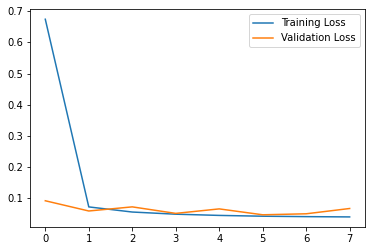

In [127]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [128]:
from tensorflow.keras.models import load_model

In [129]:
reconstructions = model.predict(df, verbose=0)
# print(yhat[0])

In [130]:
model.save('20_40_mse_adam2_5epoch.h5')
#savedModel=load_model('gfgModel.h5')

In [131]:
#train_loss = tf.keras.losses.mse(reconstructions, df)
train_loss = np.mean(np.abs(reconstructions - df), axis=1)
print(train_loss[10])
print(train_loss[100])
print(train_loss[1000])
print(train_loss[500])
print(train_loss[800])
#yhat = savedModel.predict(df, verbose=0)
# print(yhat[0].shape)
# print(yhat[20000])

[0.36300678]
[0.06887526]
[0.03783735]
[0.11671378]
[0.11057558]


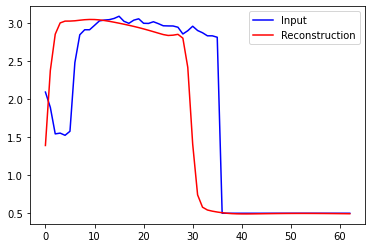

In [132]:
plt.plot(df[10], 'b')
plt.plot(reconstructions[10], 'r')
#plt.fill_between(np.arange(63), yhat[0],df[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction"])
plt.show()

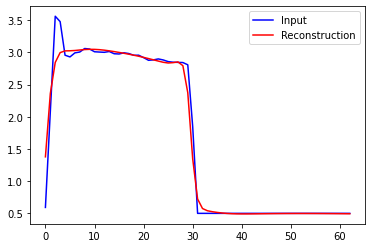

In [133]:
plt.plot(df[100], 'b')
plt.plot(reconstructions[100], 'r')
#plt.fill_between(np.arange(63), yhat[0],df[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction"])
plt.show()